<a href="https://colab.research.google.com/github/jaquicen/Indice-de-felicidad/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
archivos=['https://raw.githubusercontent.com/jaquicen/Indice-de-felicidad/refs/heads/main/TEH_World_Happiness_2015_2018_Imputed.csv', 'https://raw.githubusercontent.com/jaquicen/Indice-de-felicidad/refs/heads/main/TEH_World_Happiness_2015_2019_Imputed.csv', 'https://raw.githubusercontent.com/jaquicen/Indice-de-felicidad/refs/heads/main/TEH_World_Happiness_2019_Imputed.csv']

# Leer cada archivo y guardarlo en una lista de DataFrames
dfs=[pd.read_csv(f) for f in archivos]

# Concatenar todos los DataFrames verticalmente (filas)
df_proyecto=pd.concat(dfs, ignore_index=True)

In [ ]:
df_proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1564 non-null   object 
 1   Happiness rank   1564 non-null   int64  
 2   Happiness Score  1564 non-null   float64
 3   GDP per capita   1554 non-null   float64
 4   Social support   1554 non-null   float64
 5   Healthy life     1554 non-null   float64
 6   Freedom          1554 non-null   float64
 7   Generosity       1554 non-null   float64
 8   Corruption       1550 non-null   float64
 9   Year             1564 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 122.3+ KB


In [ ]:
df_proyecto[df_proyecto['Healthy life'].isnull()] # Filtra por los nulos

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
122,Sierra Leone,123,4.507,0.330240,0.955710,NaN,0.408400,0.214880,0.087860,2015
268,Sierra Leone,111,4.635,0.364850,0.628000,NaN,0.306850,0.238970,0.081960,2016
453,Lesotho,139,3.808,0.521021,1.190095,NaN,0.390661,0.157497,0.119095,2017
582,Sierra Leone,113,4.571,0.256000,0.813000,NaN,0.355000,0.238000,0.053000,2018
748,Sierra Leone,123,4.507,0.330240,0.955710,NaN,0.408400,0.214880,0.087860,2015
894,Sierra Leone,111,4.635,0.364850,0.628000,NaN,0.306850,0.238970,0.081960,2016
1079,Lesotho,139,3.808,0.521021,1.190095,NaN,0.390661,0.157497,0.119095,2017
1208,Sierra Leone,113,4.571,0.256000,0.813000,NaN,0.355000,0.238000,0.053000,2018
1386,Swaziland,135,4.212,0.811000,1.149000,NaN,0.313000,0.074000,0.135000,2019
1542,Swaziland,135,4.212,0.811000,1.149000,NaN,0.313000,0.074000,0.135000,2019


In [ ]:
df_proyecto[df_proyecto.isnull().any(axis=1)] # Para filtrar y devolver solo las filas que contienen al menos un valor NaN en alguna de sus columnas

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
73,Indonesia,74,5.399,0.82827,1.08708,0.63793,0.46611,0.51535,NaN,2015
101,Greece,102,4.857,1.15406,0.92933,0.88213,0.07699,NaN,0.01397,2015
111,Iraq,112,4.677,0.98549,0.81889,0.60237,NaN,0.17922,0.13788,2015
119,Congo (Kinshasa),120,4.517,NaN,1.00120,0.09806,0.22605,0.24834,0.07625,2015
122,Sierra Leone,123,4.507,0.33024,0.95571,NaN,0.40840,0.21488,0.08786,2015
...,...,...,...,...,...,...,...,...,...,...
1489,Greece,82,5.287,1.18100,1.15600,0.99900,0.06700,NaN,0.03400,2019
1519,Somalia,112,4.668,NaN,0.69800,0.26800,0.55900,0.24300,0.27000,2019
1542,Swaziland,135,4.212,0.81100,1.14900,NaN,0.31300,0.07400,0.13500,2019
1561,Afghanistan,154,3.203,0.35000,0.51700,0.36100,NaN,0.15800,0.02500,2019


## Se limpian los datos

In [ ]:
# Conteo de valores nulos
df_proyecto.isnull().sum()

,0
Country,0
Happiness rank,0
Happiness Score,0
GDP per capita,10
Social support,10
Healthy life,10
Freedom,10
Generosity,10
Corruption,14
Year,0


In [ ]:
for col in df_proyecto.select_dtypes(include=['number']).columns:
  df_proyecto[col]=df_proyecto[col].fillna(df_proyecto[col].mean())

# Validamos que los cambios se hayan aplicado
df_proyecto.isnull().sum()

,0
Country,0
Happiness rank,0
Happiness Score,0
GDP per capita,0
Social support,0
Healthy life,0
Freedom,0
Generosity,0
Corruption,0
Year,0


Columna Happiness rank
count    1564.000000
mean       78.698210
std        45.167928
min         1.000000
25%        40.000000
50%        79.000000
75%       118.000000
max       158.000000
Name: Happiness rank, dtype: float64
--------------------------------------------------
Columna Happiness Score
count    1564.000000
mean        5.379018
std         1.127096
min         2.693000
25%         4.509000
50%         5.322000
75%         6.192000
max         7.769000
Name: Happiness Score, dtype: float64
--------------------------------------------------
Columna GDP per capita
count    1564.000000
mean        0.921942
std         0.400520
min         0.015300
25%         0.620000
50%         0.982205
75%         1.237000
max         2.096000
Name: GDP per capita, dtype: float64
--------------------------------------------------
Columna Social support
count    1564.000000
mean        1.085332
std         0.317875
min         0.104190
25%         0.872000
50%         1.124735
75%         

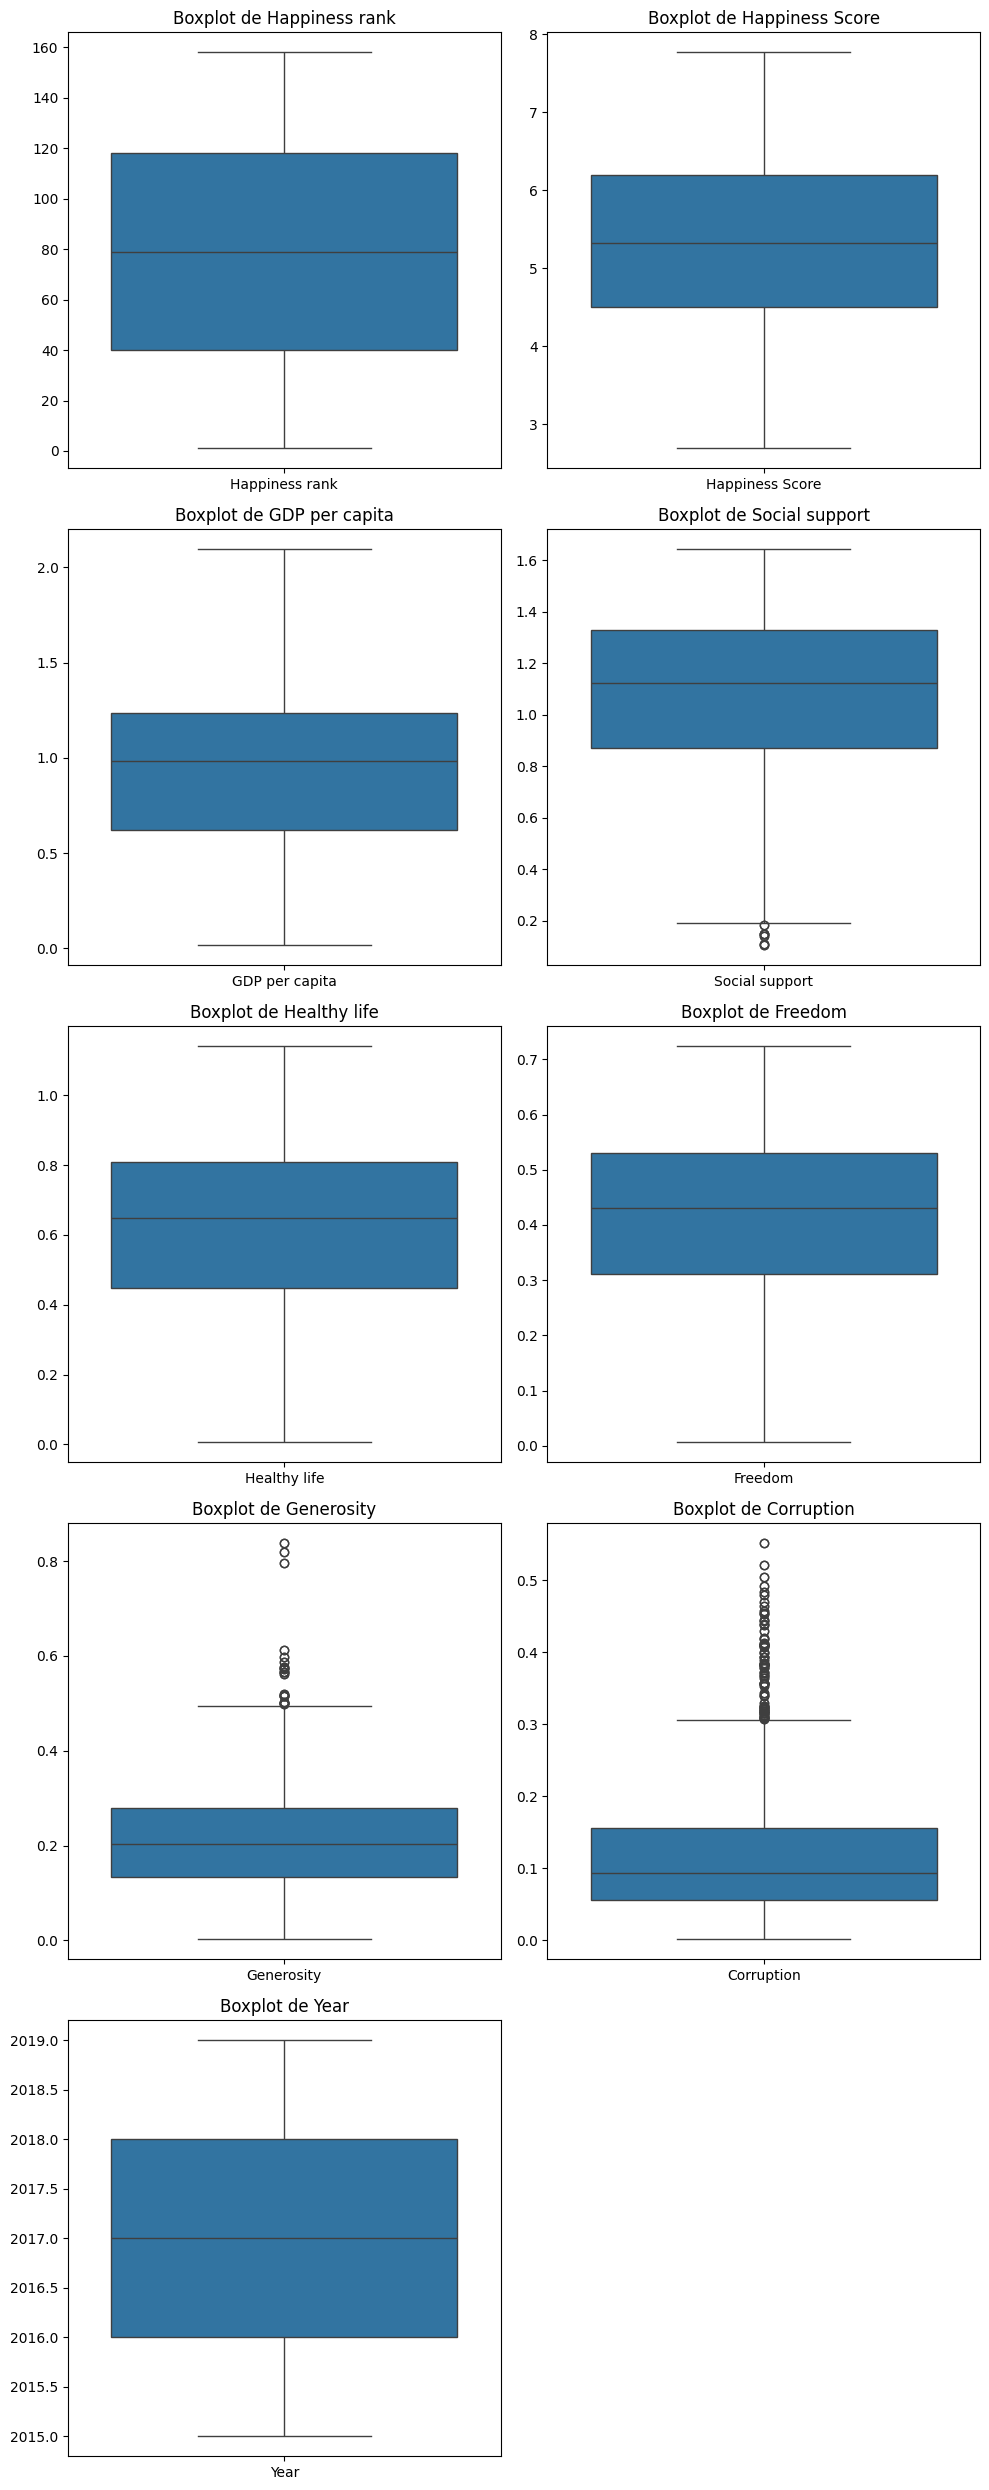

In [ ]:
def graficar_boxplots(df, columnas):
    for a in columnas:
      print(f"Columna {a}")
      print(df[a].describe())
      print("-"*50)


    n=len(columnas)
    filas=(n + 1) // 2  # número de filas de subgráficos
    plt.figure(figsize=(10, 5 * filas))  # tamaño ajustado al número de filas

    for i, col in enumerate(columnas, 1):
        plt.subplot(filas, 2, i)  # 2 columnas por fila
        sns.boxplot(data=df[[col]])
        plt.title(f"Boxplot de {col}")
        plt.xlabel("")  # opcional: ocultar etiquetas

    plt.tight_layout()
    plt.show()

columnas_numericas=df_proyecto.select_dtypes(include=['number']).columns
graficar_boxplots(df_proyecto, columnas_numericas)

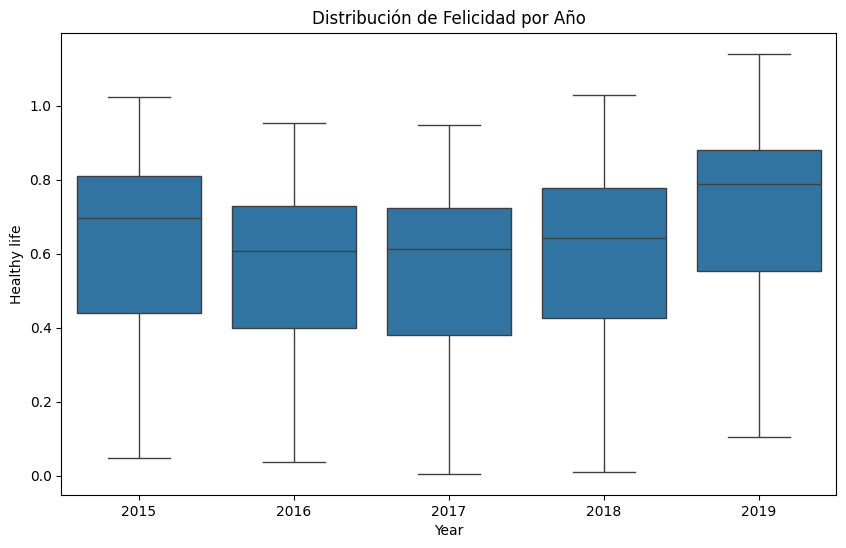

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_proyecto, x='Year', y='Healthy life')
plt.title('Distribución de Felicidad por Año')
plt.show()

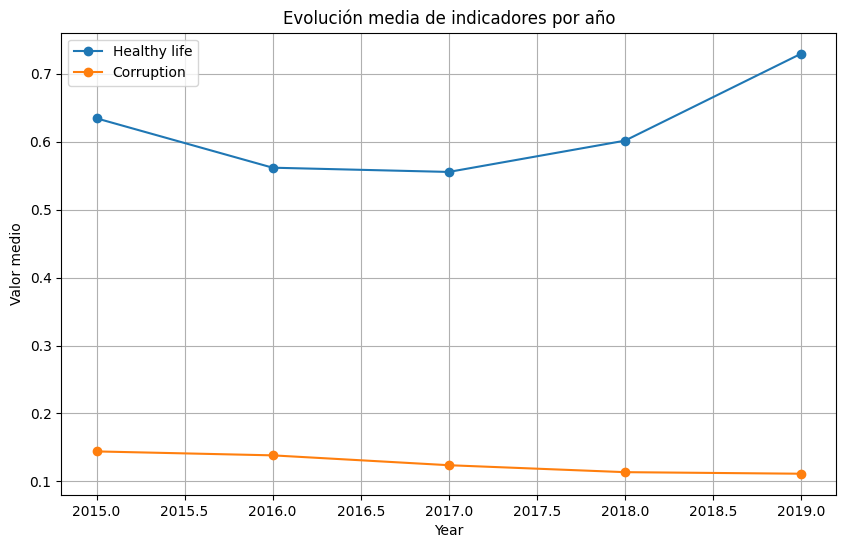

In [ ]:
df_proyecto.groupby('Year')[['Healthy life', 'Corruption']].mean().plot(marker='o', figsize=(10,6))
plt.title('Evolución media de indicadores por año')
plt.ylabel('Valor medio')
plt.grid(True)
plt.show()

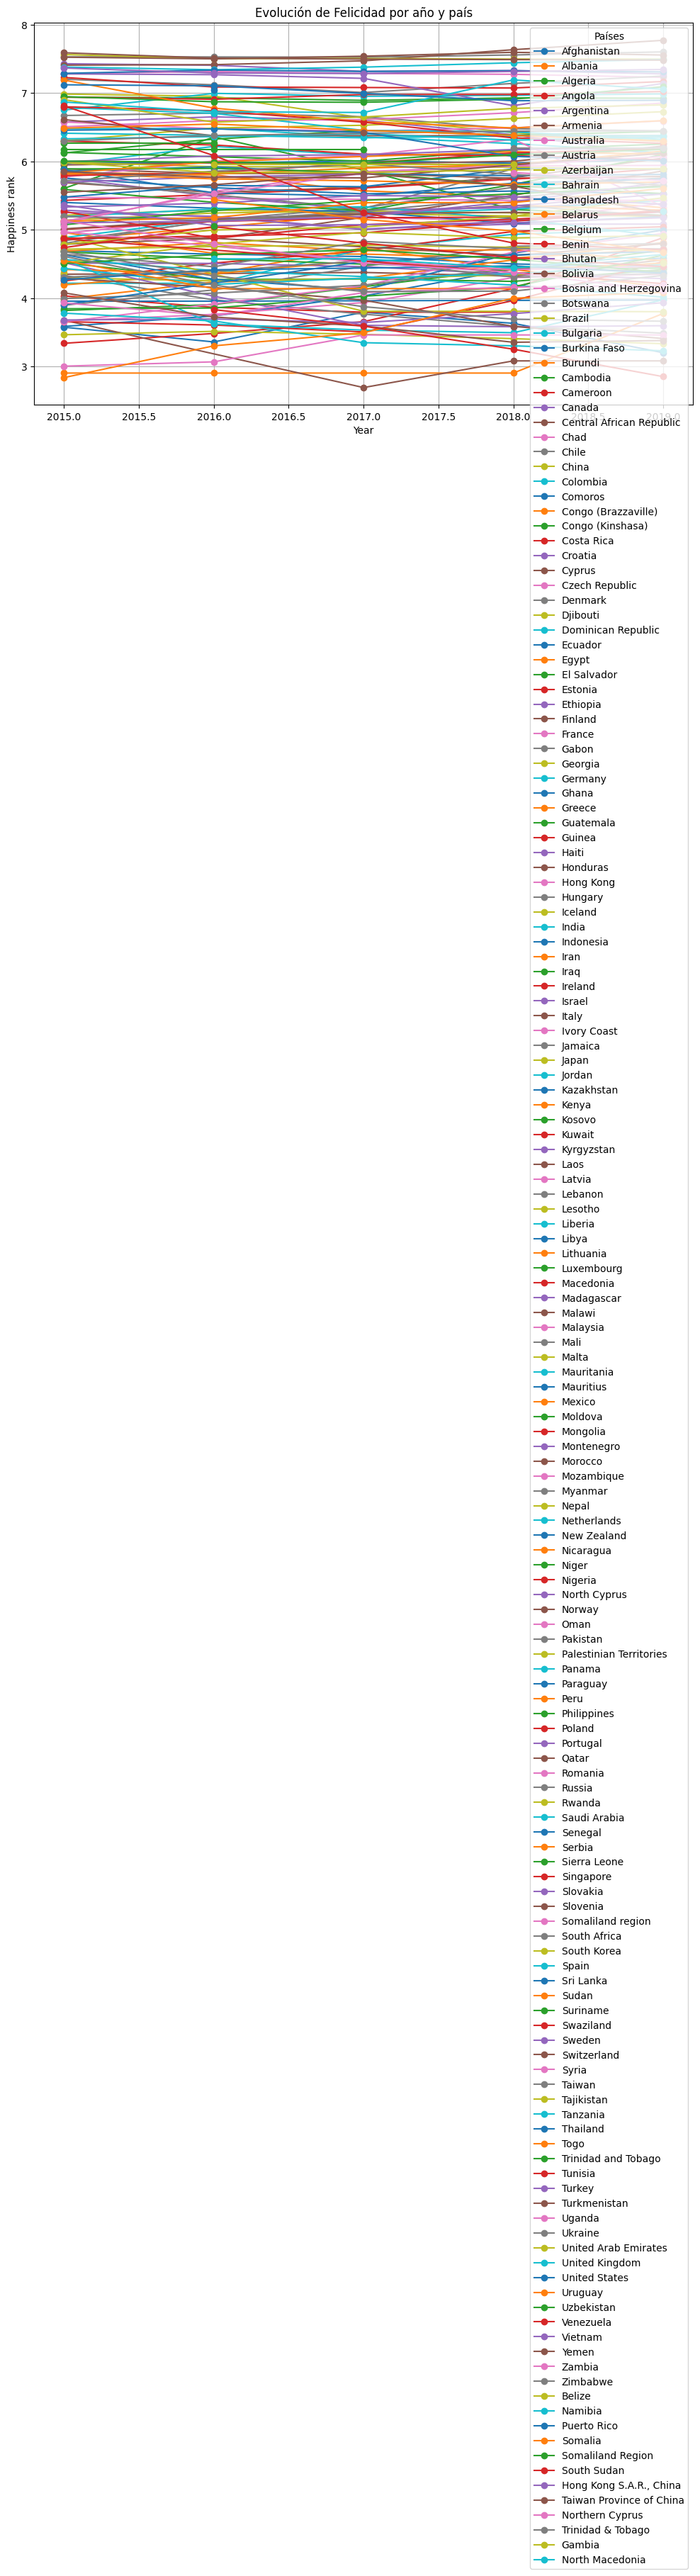

In [ ]:
# Agrupamos por Año y País, calculamos media de indicadores
df_proyecto=df_proyecto.groupby(['Year', 'Country'])[['Happiness rank', 'Happiness Score', 'Corruption']].mean().reset_index()

plt.figure(figsize=(12, 7))

conteo_paises=df_proyecto.groupby('Country')['Country'].count().sort_values(ascending=False)
# print(conteo_paises.head(10))
conteo_paises.value_counts()

# Para cada país, graficamos la serie temporal de Felicidad
for pais in df_proyecto['Country'].unique():
    datos_pais = df_proyecto[df_proyecto['Country'] == pais]
    plt.plot(datos_pais['Year'], datos_pais['Happiness Score'], marker='o', label=pais)

plt.title('Evolución de Felicidad por año y país')
plt.xlabel('Year')
plt.ylabel('Happiness rank')
plt.grid(True)
plt.legend(title='Países')
plt.show()

In [ ]:
df_proyecto.describe()

,Year,Happiness rank,Happiness Score,Corruption
count,782.000000,782.000000,782.000000,782.000000
mean,2016.993606,78.698210,5.379018,0.126407
std,1.417364,45.182384,1.127456,0.105171
min,2015.000000,1.000000,2.693000,0.001000
25%,2016.000000,40.000000,4.509750,0.055376
50%,2017.000000,79.000000,5.322000,0.092850
75%,2018.000000,118.000000,6.189500,0.155861
max,2019.000000,158.000000,7.769000,0.551910


PREGUNTAS:


1.   ¿hay "clusters de alta felicidad" o "clusters de baja felicidad" con características socioeconómicas o culturales en común?
2.   ¿Qué características socioeconómicas (PIB per cápita, esperanza de vida, apoyo social, libertad, corrupción, generosidad) están más correlacionadas con puntajes de felicidad bajos?
3.   ¿Podríamos desarrollar productos, servicios o incluso modelos de inversión de impacto que aborden las causas de la infelicidad en esos países?
4.   ¿Podemos extraer "mejores prácticas" (ya sean políticas públicas, modelos de negocio o tendencias culturales) que puedan ser replicables en otros contextos para mejorar el bienestar general?
5.   ¿Existe una correlación entre el puntaje de felicidad de un país y ciertos patrones de consumo (ej. gasto en ocio, salud mental, productos sostenibles)?
6.   ¿Cómo se han visto afectados los puntajes de felicidad de los países por eventos globales (pandemias, crisis económicas, conflictos)?





